In [1]:
!matplotib inline

"matplotib" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
path = '.\\competitive-data-science-predict-future-sales\\'

In [ ]:
def load_data():
    """
    This function is loading all provided in the task data
    """  
    item_categories = pd.read_csv(path + 'item_categories.csv')
    items = pd.read_csv(path + 'items.csv')
    train = pd.read_csv(path + 'sales_train.csv')
    sample_submission = pd.read_csv(path + 'sample_submission.csv')
    shops = pd.read_csv(path + 'shops.csv')
    test = pd.read_csv(path + 'test.csv')
    return item_categories, items, train, sample_submission, shops, test

In [ ]:
item_categories, items, train, sample_submission, shops, test = load_data() 

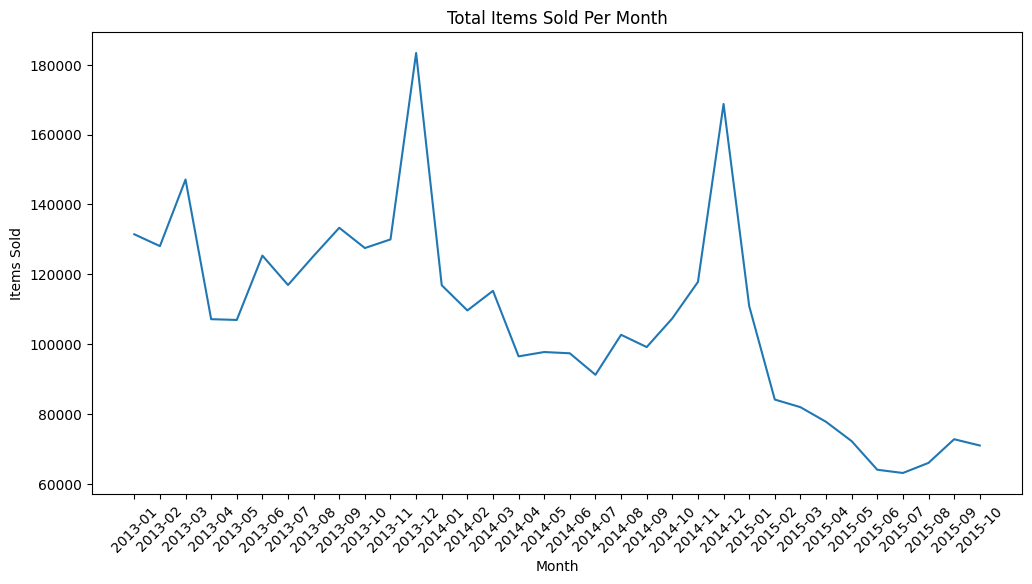

In [50]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train['month'] = train['date'].dt.to_period('M')
monthly_sales = train.groupby('month')['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales['month'].astype(str), y=monthly_sales['item_cnt_day'])
plt.title('Total Items Sold Per Month')
plt.xlabel('Month')
plt.ylabel('Items Sold')
plt.xticks(rotation=45)
plt.show()

As we can see, sale peaks appear right before Christmas and New Year.

In [ ]:
train.iloc[100:120, :] #just exploring what we have in this dataset

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
100,2013-01-04,0,25,2705,1799.0,1.0,2013-01
101,2013-01-20,0,25,2808,999.0,1.0,2013-01
102,2013-01-22,0,25,2808,999.0,1.0,2013-01
103,2013-01-23,0,25,2808,999.0,1.0,2013-01
104,2013-01-24,0,25,2808,999.0,1.0,2013-01
105,2013-01-25,0,25,2808,999.0,2.0,2013-01
106,2013-01-26,0,25,2808,999.0,1.0,2013-01
107,2013-01-27,0,25,2808,999.0,3.0,2013-01
108,2013-01-28,0,25,2808,999.0,1.0,2013-01
109,2013-01-17,0,25,2628,299.0,1.0,2013-01


In [52]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [53]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [61]:
unique_shops = shops['shop_name'].unique
len_shops_df = len(shops)
if unique_shops == len_shops_df:
    print('All the shops are unique')
else:
    print('The shops are repeated')

The shops are repeated


In [63]:
shops.iloc[0:80,:]

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


After short analysis we can spot that the same shops repeated in this dataset several times